## Reports on some functions on Slik_wrangler that i think needs to be modified a bit.

- The output of outliers given when the data assesment function is implemented is not the right output having done a manual outlier checking on some of the data(columns). **Check the customer_age column of the sales_info.**

- The output gives an empty row after each row when i run the `split` on the data file. I think that should be fixed and also the there should be a way the user determines the number of data rows the user wants **i.e: User should be able to determine the start row number and end row number**. 

- The check for duplicate function is giving rows that are not duplicates.

- The rename_similar_values function tends to work better with small datasets and not with a large dataset which takes long to run also, it seems it only work for similar data above the data of similar/related information below.

- Is there a way to list the columns with the ouliers when using the detect_fix_outliers function? so as the user can easily get trace and know the column(s) with outlier.


In [2]:
import pandas as pd

import slik_wrangler

from slik_wrangler import loadfile as lf 

#property = lf.read_file("C:/Users/BABAJIDE/OneDrive - AfriMine/Documents/Webscraping/property_in_Nigeria.csv")

In [2]:
# pip install openpyxl

In [2]:
pd.read_excel("C:/Users/BABAJIDE/Desktop/BABS/Datacamp(Writing Efficient Code)/istanbulsonbiryldepremverisi.xlsx", ["Son depremler"])

{'Son depremler':             #EventID                    Time    Latitude    Longitude   \
 0    20200204_0000090  2020-02-04T10:17:09.4Z       38.98        27.86   
 1    20200204_0000082  2020-02-04T08:43:16.0Z       38.98        27.87   
 2    20200204_0000067  2020-02-04T06:13:29.2Z       38.42        25.51   
 3    20200204_0000046  2020-02-04T03:42:21.5Z       38.40        25.53   
 4    20200204_0000034  2020-02-04T03:14:45.4Z       39.08        27.83   
 ..                ...                     ...         ...          ...   
 344  20190429_0000132  2019-04-29T18:39:50.8Z       39.42        26.36   
 345  20190429_0000124  2019-04-29T18:02:43.3Z       39.38        26.29   
 346  20190428_0000079  2019-04-28T14:49:25.1Z       38.69        26.90   
 347  20190412_0000074  2019-04-12T13:03:47.8Z       40.69        30.61   
 348  20190402_0000092  2019-04-02T16:07:43.6Z       38.59        31.14   
 
       Depth/km   MagType    Magnitude                  EventLocationName  
 0   

In [3]:
path = "C:/Users/BABAJIDE/Desktop/BABS/Datacamp(Writing Efficient Code)/sales_data.csv - sales_data.csv"

In [5]:
sales_info = lf.read_file(path)


CSV file read sucessfully

Data has 113036 rows and 18 columns


In [6]:
help(slik_wrangler.dqa.consistent_structure_assessement)

Help on function consistent_structure_assessement in module slik_wrangler.dqa:

consistent_structure_assessement(dataframe, display_findings=True)
    Checks the consitent nature of each feature column.
    
    It checks if the dtype across each feature column is consistent.
    i.e. if there is an interger variable and a string variable across
    the various feature columns.
    
    For categorical columns. assessment is made on duplicate categories
    i.e. medium and Medium are the same categories and inconsistent.



In [4]:
get_into = lf.split_csv_file(path,row_limit= 100000,output_path='C:/Users/BABAJIDE/Desktop/BABS/Datacamp(Writing Efficient Code)/')
# The new table has space after each row.  CSV is created in the number of rows available by the number of row created user should be able to choose the start and stop rows wanted by the user.

In [5]:
sales_info.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [13]:
from slik_wrangler.dqa import data_cleanness_assessment as dca

In [14]:
dca(dataframe=sales_info,  display_findings=True) #Seems Outlier calculation is not correct,  Also the Duplicate rows are not totally representing the duplicates values 

Checking for missing values

No missing values!!!


Checking for duplicate variables

Dataframe contains duplicate rows that you should address. 

rows=[1021, 1091, 1093, 1095, 1193, ..., 111029, 111031, 111265, 111953, 111955]



,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
1021,2013-12-19,19,December,2013,22,Youth (<25),M,Australia,New South Wales,Accessories,Bike Stands,All-Purpose Bike Stand,9,59,159,714,531,1245
1091,2015-09-30,30,September,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,5,4,10,20,20,40
1093,2013-10-24,24,October,2013,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,2,4,10,8,8,16
1095,2015-10-24,24,October,2015,42,Adults (35-64),F,Australia,Victoria,Accessories,Bottles and Cages,Mountain Bottle Cage,1,4,10,4,4,8
1193,2016-01-15,15,January,2016,42,Adults (35-64),M,France,Seine Saint Denis,Accessories,Bottles and Cages,Water Bottle - 30 oz.,14,2,5,29,28,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111029,2014-02-18,18,February,2014,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111031,2016-02-18,18,February,2016,49,Adults (35-64),F,United States,California,Bikes,Touring Bikes,"Touring-1000 Blue, 60",1,1482,2384,854,1482,2336
111265,2014-04-27,27,April,2014,31,Young Adults (25-34),M,United States,Washington,Bikes,Touring Bikes,"Touring-1000 Blue, 50",1,1482,2384,378,1482,1860
111953,2013-09-20,20,September,2013,42,Adults (35-64),M,Canada,British Columbia,Bikes,Touring Bikes,"Touring-3000 Yellow, 44",1,461,742,274,461,735




Checking for outliers

Ignore target column, if target column is considered an outlier

Dataframe contains outliers that you should address. 

columns=[Customer_Age, Unit_Cost, Unit_Price, Profit, Cost, Revenue]



,Customer_Age,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,19,45,120,590,360,950
1,19,45,120,590,360,950
2,49,45,120,1366,1035,2401
3,49,45,120,1188,900,2088
4,47,45,120,238,180,418




Checking for inconsistent values

No inconsistent feature columns values!!!




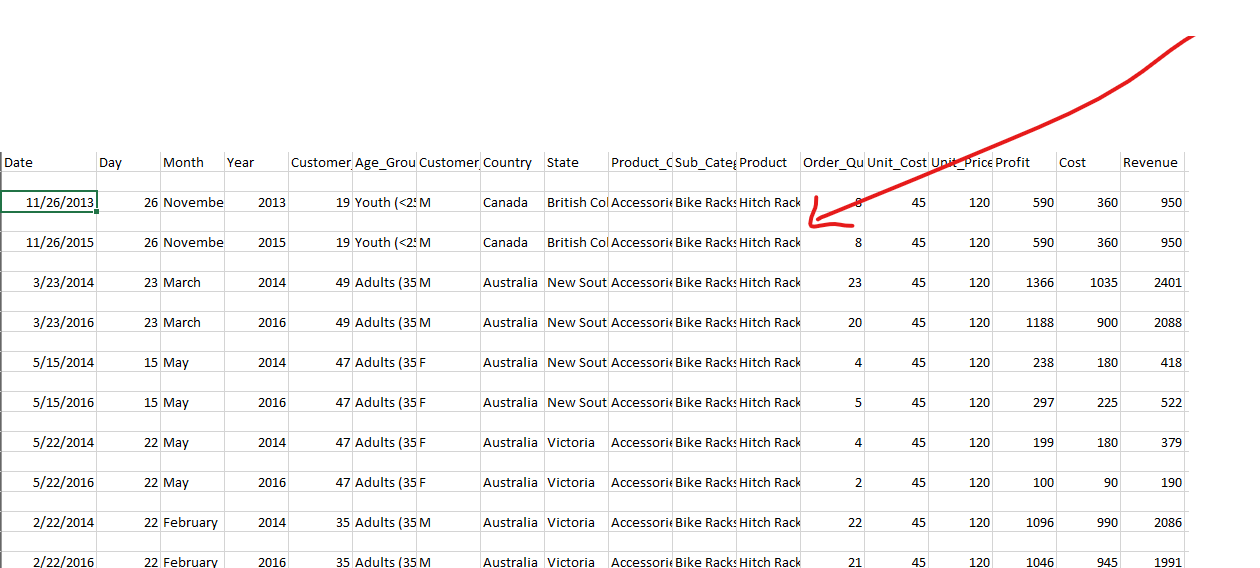

In [21]:
from IPython.display import Image
Image(filename="##############",width=800, height=400)
# I don't think there is a need for a Row after each data row when the slik_wrangler.loadfile.split_csv_file is used to get data in pagination.

In [25]:
#sales_info['Customer_Age'].describe()

count    113036.000000
mean         35.919212
std          11.021936
min          17.000000
25%          28.000000
50%          35.000000
75%          43.000000
max          87.000000
Name: Customer_Age, dtype: float64

In [15]:
# def find_outliers_IQR(df):

#    q1=df.quantile(0.25)

#    q3=df.quantile(0.75)

#    IQR=q3-q1

#    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#    return(outliers)

In [9]:
# test = find_outliers_IQR(sales_info['Customer_Age'])

In [22]:
# test

In [ ]:
# def drop_outliers_IQR(df):

#    q1=df.quantile(0.25)

#    q3=df.quantile(0.75)

#    IQR=q3-q1

#    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#    outliers_dropped = outliers.dropna().reset_index()

#    return outliers_dropped

In [11]:
from slik_wrangler.dqa import (
    missing_value_assessment,
    duplicate_assessment,
    outliers_assessment,
    consistent_structure_assessement
)

In [16]:
{
    "Missing values columns": missing_value_assessment.missing_columns,
    "Duplicated rows value": duplicate_assessment.duplicated_rows,
    "Duplicated columns value": duplicate_assessment.duplicated_columns,
    "Feature columns with outliers": outliers_assessment.contains_outliers,
    "Inconsistent feature columns": consistent_structure_assessement.inconsistent_cols
}

{'Missing values columns': [],
 'Duplicated rows value': [1021,
  1091,
  1093,
  1095,
  1193,
  1203,
  1213,
  1537,
  1541,
  1595,
  1597,
  1600,
  1697,
  1839,
  1985,
  2003,
  2005,
  2133,
  2147,
  2195,
  2317,
  2327,
  2329,
  2463,
  2491,
  2505,
  2513,
  2515,
  2615,
  2657,
  2715,
  2767,
  2814,
  2815,
  2845,
  2943,
  2979,
  2993,
  3077,
  3085,
  3105,
  3286,
  3297,
  3299,
  3443,
  3519,
  3579,
  3609,
  3647,
  3669,
  3713,
  3779,
  3869,
  3935,
  3971,
  4015,
  4033,
  4035,
  4095,
  4115,
  4307,
  4341,
  4439,
  4615,
  4621,
  4731,
  4733,
  4745,
  4795,
  4837,
  4881,
  4983,
  5001,
  5053,
  5055,
  5235,
  5287,
  5291,
  5423,
  5425,
  5443,
  5533,
  5535,
  5559,
  5721,
  5759,
  5803,
  5959,
  6089,
  6179,
  6201,
  6211,
  6261,
  6369,
  6435,
  6495,
  6525,
  6547,
  6671,
  6779,
  6925,
  6941,
  6971,
  7223,
  7401,
  7461,
  7593,
  7595,
  7703,
  7717,
  7829,
  8001,
  8006,
  8017,
  8032,
  8069,
  8117,
  8149,


In [17]:
from slik_wrangler import preprocessing as pp

In [18]:
new_broadway_dataset = pp.drop_duplicate(
    # The dataset to remove the duplicates on
    dataframe=sales_info,
    
    # Specifies all the columns
    columns=sales_info.columns,
    
    # Specifies the rows for duplicate removal
    method='columns',
    
    # Displays activities during operation
    display_inline=True
)


--------------- Dropping duplicates across the columns ---------------

New datashape is (113036, 18)


In [20]:
len(sales_info)

113036

In [21]:
len(new_broadway_dataset)

113036

In [27]:
new_broadway_datasets = pp.detect_fix_outliers(
    # Dataset to exclude outliers from
    dataframe=sales_info,
    
    # Target feature column
    target_column='Unit_Cost',
    
    # Displays activities during operation
    display_inline=True
)


--------------- Table identifying at least 1 outliers in a row ---------------



,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
42980,2013-12-08,8,December,2013,74,Seniors (64+),M,United Kingdom,England,Accessories,Hydration Packs,Hydration Pack - 70 oz.,28,21,55,890,588,1478
42981,2015-12-08,8,December,2015,74,Seniors (64+),M,United Kingdom,England,Accessories,Hydration Packs,Hydration Pack - 70 oz.,30,21,55,954,630,1584
43004,2014-02-02,2,February,2014,73,Seniors (64+),F,Canada,British Columbia,Accessories,Hydration Packs,Hydration Pack - 70 oz.,29,21,55,970,609,1579
43005,2016-02-02,2,February,2016,73,Seniors (64+),F,Canada,British Columbia,Accessories,Hydration Packs,Hydration Pack - 70 oz.,26,21,55,870,546,1416
48090,2013-09-04,4,September,2013,66,Seniors (64+),M,Canada,British Columbia,Clothing,Jerseys,"Long-Sleeve Logo Jersey, M",28,38,50,322,1064,1386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73275,2016-03-13,13,March,2016,60,Adults (35-64),M,Canada,British Columbia,Clothing,Shorts,"Women's Mountain Shorts, M",28,26,70,1212,728,1940
73280,2014-04-21,21,April,2014,59,Adults (35-64),F,Canada,British Columbia,Clothing,Shorts,"Women's Mountain Shorts, L",28,26,70,1212,728,1940
73302,2013-08-14,14,August,2013,20,Youth (<25),M,Canada,British Columbia,Clothing,Shorts,"Women's Mountain Shorts, M",28,26,70,1212,728,1940
73368,2014-02-09,9,February,2014,43,Adults (35-64),F,Canada,British Columbia,Clothing,Shorts,"Women's Mountain Shorts, M",30,26,70,1299,780,2079


In [29]:
new_broadway_datasets

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120.0,590.000000,360.0,950.00000
1,2015-11-26,26,November,2015,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120.0,590.000000,360.0,950.00000
2,2014-03-23,23,March,2014,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120.0,285.058919,1035.0,754.37036
3,2016-03-23,23,March,2016,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120.0,285.058919,900.0,754.37036
4,2014-05-15,15,May,2014,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120.0,238.000000,180.0,418.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41.0,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64.0,112.000000,72.0,184.00000
113032,2014-04-02,2,April,2014,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64.0,655.000000,528.0,1183.00000
113033,2016-04-02,2,April,2016,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64.0,655.000000,528.0,1183.00000
113034,2014-03-04,4,March,2014,37.0,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64.0,684.000000,576.0,1260.00000


In [22]:
import numpy as np

In [23]:
upper,lower = np.percentile(sales_info['Customer_Age'].dropna(), 75), np.quantile(sales_info['Customer_Age'].dropna(), 0.25)

In [24]:
IQR=upper-lower

   #not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

In [28]:
upper_outlier,lower_outlier = upper + 1.5*IQR, lower - 1.5*IQR

In [29]:
upper_outlier

65.5

In [30]:
lower_outlier

5.5

In [31]:
sales_info[sales_info['Customer_Age'] <= 5.5]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue


In [60]:
sales_info[sales_info['Customer_Age'] >= 65.5]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
124,2014-04-27,27,April,2014,67,Seniors (64+),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,145,90,235
125,2016-04-27,27,April,2016,67,Seniors (64+),F,United States,California,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,73,45,118
134,2014-02-19,19,February,2014,87,Seniors (64+),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,107,90,197
135,2016-02-19,19,February,2016,87,Seniors (64+),F,Germany,Saarland,Accessories,Bike Racks,Hitch Rack - 4-Bike,3,45,120,160,135,295
812,2014-05-25,25,May,2014,84,Seniors (64+),F,United Kingdom,England,Accessories,Bike Stands,All-Purpose Bike Stand,5,59,159,468,295,763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112615,2016-06-15,15,June,2016,70,Seniors (64+),F,United Kingdom,England,Clothing,Vests,"Classic Vest, S",14,24,64,524,336,860
112906,2014-07-01,1,July,2014,68,Seniors (64+),F,United States,California,Clothing,Vests,"Classic Vest, M",3,24,64,116,72,188
112907,2016-07-01,1,July,2016,68,Seniors (64+),F,United States,California,Clothing,Vests,"Classic Vest, M",1,24,64,39,24,63
112938,2013-11-16,16,November,2013,79,Seniors (64+),M,United States,California,Clothing,Vests,"Classic Vest, S",5,24,64,194,120,314


In [61]:
from slik_wrangler.dqa import outliers_assessment
outliers_assessment(sales_info) # Seems the table is not displying the right outlier

Ignore target column, if target column is considered an outlier

Dataframe contains outliers that you should address. 

columns=[Customer_Age, Unit_Cost, Unit_Price, Profit, Cost, Revenue]



,Customer_Age,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,19,45,120,590,360,950
1,19,45,120,590,360,950
2,49,45,120,1366,1035,2401
3,49,45,120,1188,900,2088
4,47,45,120,238,180,418


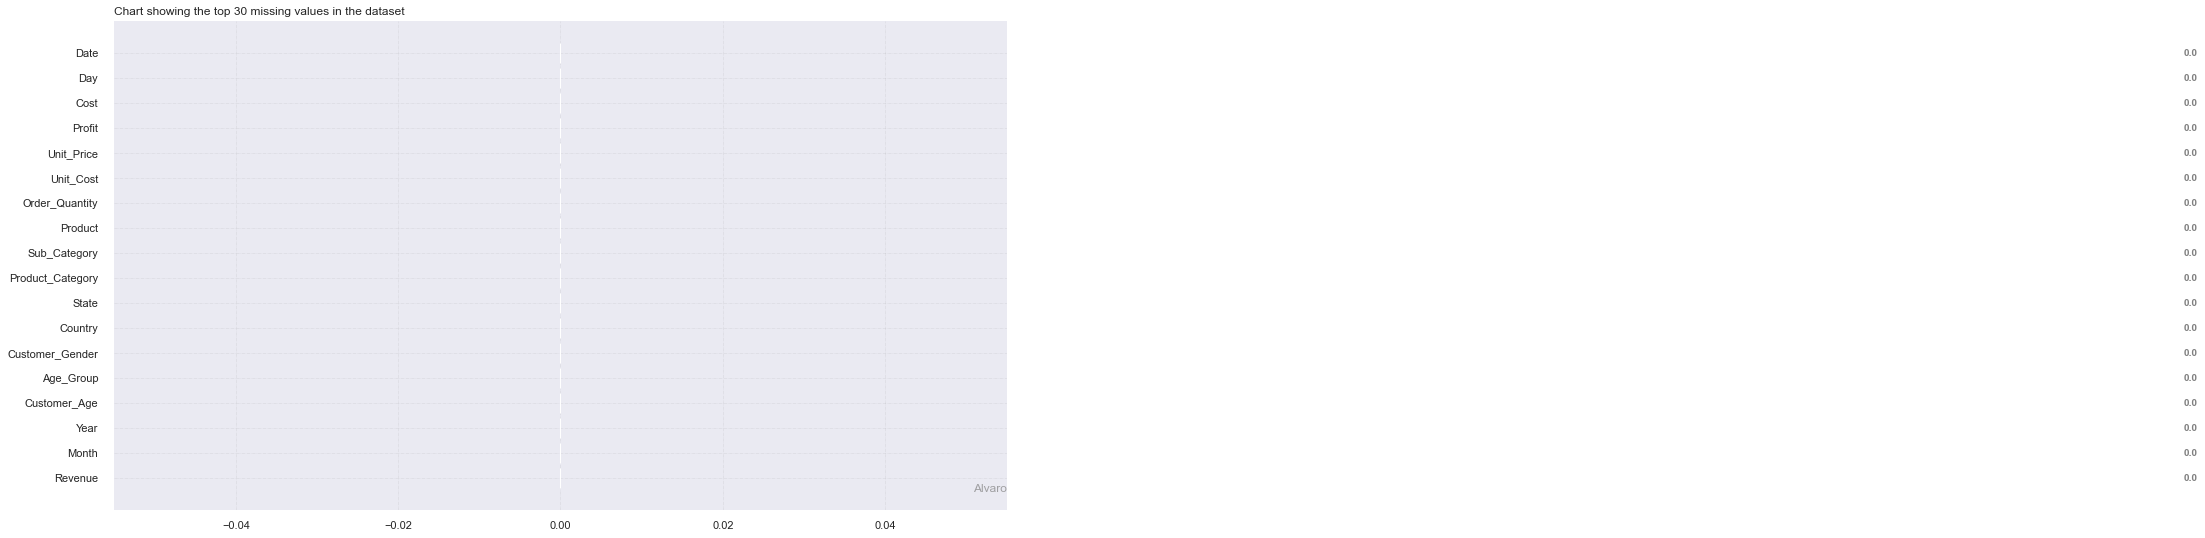

In [63]:
pp.check_nan(sales_info,plot=True, display_inline=False)

In [64]:
pp.handle_nan(
    # Dataset to exclude outliers from
    dataframe=new_broadway_dataset,
    
    # Target feature column
    target_name='Unit_Price',
    
    # Displays activities during operation
    display_inline=True
)


Dropping rows with 75% missing value: Number of records dropped is 0

Dropping Columns with 75% missing value: []

New data shape is (113036, 18)


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,120.0,590.000000,360.0,950.00000
1,2015-11-26,26,November,2015,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45.0,120.0,590.000000,360.0,950.00000
2,2014-03-23,23,March,2014,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45.0,120.0,285.058919,1035.0,754.37036
3,2016-03-23,23,March,2016,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45.0,120.0,285.058919,900.0,754.37036
4,2014-05-15,15,May,2014,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45.0,120.0,238.000000,180.0,418.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41.0,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24.0,64.0,112.000000,72.0,184.00000
113032,2014-04-02,2,April,2014,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24.0,64.0,655.000000,528.0,1183.00000
113033,2016-04-02,2,April,2016,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24.0,64.0,655.000000,528.0,1183.00000
113034,2014-03-04,4,March,2014,37.0,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24.0,64.0,184.650876,576.0,1260.00000


In [70]:
sales_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

In [65]:
from slik_wrangler.dqa import missing_value_assessment

In [66]:
missing_value_assessment(sales_info)

No missing values!!!


In [67]:
pp.check_datefield(sales_info)

False

In [74]:
sales_info.head(2)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950


In [76]:
DEF = slik_wrangler.preprocessing.featurize_datetime(sales_info, column_name='Date', date_features=['Year','Month','Day'], drop=False)

In [78]:
DEF.dtypes

Date                datetime64[ns]
Day                          int64
Month                        int64
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object

In [ ]:
slik_wrangler.preprocessing.handle_nan(dataframe=None, target_name=None, strategy='mean', fillna='mode', drop_outliers=True, thresh_y=75, thresh_x=75, display_inline=True)

In [87]:
columns = ["Product", "Country"]

pp.change_case(
    dataframe=sales_info,
    columns=columns,
    case='capitalize',
    inplace=False
)  #Spelling Error of capititalize instead of capitalize when showing error description for user.

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


In [33]:
slik_wrangler.preprocessing.map_target(sales_info, target_column='Customer_Gender', add_prefix=True, drop=False, display_inline=True)


--------------- Mapping target columns ---------------

M was mapped to 0

F was mapped to 1



,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,transformed_Customer_Gender
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184,0
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,0
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183,0
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260,1


In [34]:
slik_wrangler.preprocessing.map_column(sales_info,column_name='Customer_Gender',items={'M':'Male','F':'Female'}).head()


--------------- Mapping passed column ---------------

M was mapped to Male

F was mapped to Female



,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,transformed_Customer_Gender
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Male
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950,Male
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401,Male
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088,Male
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418,Female


In [ ]:
slik_wrangler.preprocessing.rename_similar_values(sales_info, 'State', cut_off=0.75, n=None)

: 

: 

In [10]:
slik_wrangler.preprocessing.preprocess(data=sales_info, target_column="Customer_Gender", train=True, select_columns=None, display_inline=True, project_path="C:/Users/BABAJIDE/Desktop/BABS/Datacamp(Writing Efficient Code)")


The task for preprocessing is classification

Dropping rows with 75% missing value: Number of records dropped is 0

Dropping Columns with 75% missing value: []

New data shape is (113036, 18)

--------------- Mapping target columns ---------------

M was mapped to 0

F was mapped to 1


--------------- Bucketize Age columns ---------------

 Inferred age column: [Customer_Age]

--------------- Featurize Datetime columns ---------------

column with datetime type: [Date]



c:\Users\BABAJIDE\anaconda3\envs\Virtual_Environment\lib\site-packages\slik_wrangler\preprocessing.py:506: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df.loc[:,targ_pre_+n] = getattr(fld.dt,n.lower())



--------------- Dropping uninformative fields ---------------

uninformative fields dropped: ['Hour', 'Minute']

--------------- Creating Schema file ---------------



{'dtype': {'Date': 'object',
  'Day': 'int64',
  'Month': 'int64',
  'Year': 'int64',
  'Customer_Age': 'float64',
  'Age_Group': 'object',
  'Country': 'object',
  'State': 'object',
  'Product_Category': 'object',
  'Sub_Category': 'object',
  'Product': 'object',
  'Order_Quantity': 'int64',
  'Unit_Cost': 'float64',
  'Unit_Price': 'float64',
  'Profit': 'float64',
  'Cost': 'float64',
  'Revenue': 'float64',
  'transformed_Customer_Gender': 'int64',
  'binned_Customer_Age': 'object',
  'Dayofweek': 'int64',
  'Isweekend': 'bool',
  'Dayofyear': 'int64',
  'Week': 'int64',
  'Is_month_end': 'bool',
  'Is_month_start': 'bool',
  'Is_quarter_end': 'bool',
  'Is_quarter_start': 'bool',
  'Is_year_end': 'bool',
  'Is_year_start': 'bool'}}



Schema file stored in C:\Users\BABAJIDE\Desktop\BABS\Datacamp(Writing Efficient Code)\data\metadata

--------------- Preview the preprocessed data ---------------



,Date,Day,Month,Year,Customer_Age,Age_Group,Country,State,Product_Category,Sub_Category,...,Dayofweek,Isweekend,Dayofyear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,2013-11-26,26,11,2013,19.0,Youth (<25),Canada,British Columbia,Accessories,Bike Racks,...,1,False,330,48,False,False,False,False,False,False
1,2015-11-26,26,11,2015,19.0,Youth (<25),Canada,British Columbia,Accessories,Bike Racks,...,3,False,330,48,False,False,False,False,False,False
2,2014-03-23,23,3,2014,49.0,Adults (35-64),Australia,New South Wales,Accessories,Bike Racks,...,6,True,82,12,False,False,False,False,False,False
3,2016-03-23,23,3,2016,49.0,Adults (35-64),Australia,New South Wales,Accessories,Bike Racks,...,2,False,83,12,False,False,False,False,False,False
4,2014-05-15,15,5,2014,47.0,Adults (35-64),Australia,New South Wales,Accessories,Bike Racks,...,3,False,135,20,False,False,False,False,False,False



--------------- Preprocessed data saved ---------------


 Input data preprocessed successfully and stored in C:/Users/BABAJIDE/Desktop/BABS/Datacamp(Writing Efficient Code)\data\train_data.pkl



In [23]:
#slik_wrangler.utils.get_scores('Customer_Gender', 'transformed_Customer_Gender')

In [13]:
slik_wrangler.utils.load_pickle("C:/Users/BABAJIDE/Desktop/BABS/Datacamp(Writing Efficient Code)/data/train_data.pkl")

,Date,Day,Month,Year,Customer_Age,Age_Group,Country,State,Product_Category,Sub_Category,...,Dayofweek,Isweekend,Dayofyear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,2013-11-26,26,11,2013,19.0,Youth (<25),Canada,British Columbia,Accessories,Bike Racks,...,1,False,330,48,False,False,False,False,False,False
1,2015-11-26,26,11,2015,19.0,Youth (<25),Canada,British Columbia,Accessories,Bike Racks,...,3,False,330,48,False,False,False,False,False,False
2,2014-03-23,23,3,2014,49.0,Adults (35-64),Australia,New South Wales,Accessories,Bike Racks,...,6,True,82,12,False,False,False,False,False,False
3,2016-03-23,23,3,2016,49.0,Adults (35-64),Australia,New South Wales,Accessories,Bike Racks,...,2,False,83,12,False,False,False,False,False,False
4,2014-05-15,15,5,2014,47.0,Adults (35-64),Australia,New South Wales,Accessories,Bike Racks,...,3,False,135,20,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,4,2016,41.0,Adults (35-64),United Kingdom,England,Clothing,Vests,...,1,False,103,15,False,False,False,False,False,False
113032,2014-04-02,2,4,2014,18.0,Youth (<25),Australia,Queensland,Clothing,Vests,...,2,False,92,14,False,False,False,False,False,False
113033,2016-04-02,2,4,2016,18.0,Youth (<25),Australia,Queensland,Clothing,Vests,...,5,True,93,13,False,False,False,False,False,False
113034,2014-03-04,4,3,2014,37.0,Adults (35-64),France,Seine (Paris),Clothing,Vests,...,1,False,63,10,False,False,False,False,False,False


In [14]:
len(sales_info)

113036